<a href="https://colab.research.google.com/github/orubaba/orubaba/blob/main/ANN_reg_on_random_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define a function that creates the data x and y

def dataset_create(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x,y


In [3]:
'''
#Define the function that builds and trains the model and output the final predictions and losses
def model_builder_trainer(x,y):    #learningRate=0.05, numepochs=500
 
  # Build the model
  ANNreg = nn.Sequential(
      nn.Linear(1,1), #input layer
      nn.ReLU(),     #activation function
      nn.Linear(1,1)) #Output layer

  #learningRate=0.05
  # loss function
  # optimizer (the kind of gradient descent to implement)
  #optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)
      
  # Train the model via number of epoch and loss
  numepochs = 500
  losses = torch.zeros(numepochs)
  # Train the model!
  for epochi in range(numepochs):

    #forward pass
    y_pred = ANNreg(x)
    # compute the loss
    loss = lossfun(y_pred, y)
    losses[epochi] = loss
    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #end of training
      
    # compute the model predictions
    predictions = ANNreg(x)

    # output

    return predictions, losses
'''


'\n#Define the function that builds and trains the model and output the final predictions and losses\ndef model_builder_trainer(x,y):    #learningRate=0.05, numepochs=500\n \n  # Build the model\n  ANNreg = nn.Sequential(\n      nn.Linear(1,1), #input layer\n      nn.ReLU(),     #activation function\n      nn.Linear(1,1)) #Output layer\n\n  #learningRate=0.05\n  # loss function\n  # optimizer (the kind of gradient descent to implement)\n  #optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)\n  lossfun = nn.MSELoss()\n  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)\n      \n  # Train the model via number of epoch and loss\n  numepochs = 500\n  losses = torch.zeros(numepochs)\n  # Train the model!\n  for epochi in range(numepochs):\n\n    #forward pass\n    y_pred = ANNreg(x)\n    # compute the loss\n    loss = lossfun(y_pred, y)\n    losses[epochi] = loss\n    # backpropagation\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    #end of t

In [4]:
def model_builder_trainer(x,y):

  # build the model
  ANNreg = nn.Sequential(
      nn.Linear(1,1),  # input layer
      nn.ReLU(),       # activation function
      nn.Linear(1,1)   # output layer
      )

  # loss and optimizer functions
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(),lr=.05)


  #### train the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    # forward pass
    y_pred = ANNreg(x)

    # compute loss
    loss = lossfun(y_pred,y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # end training loop


  ### compute model predictions
  predictions = ANNreg(x)


  # output: 
  return predictions, losses

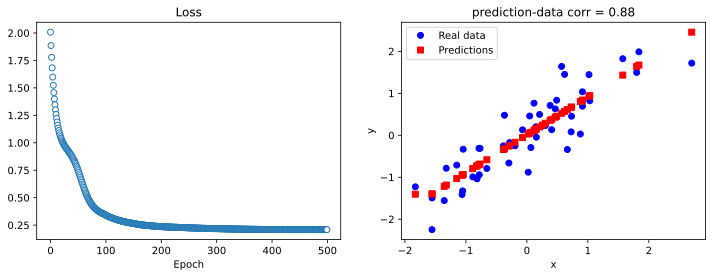

In [9]:
# create a dataset
x,y = dataset_create(.8)

# run the model
y_pred,losses = model_builder_trainer(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,y_pred.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,y_pred.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()

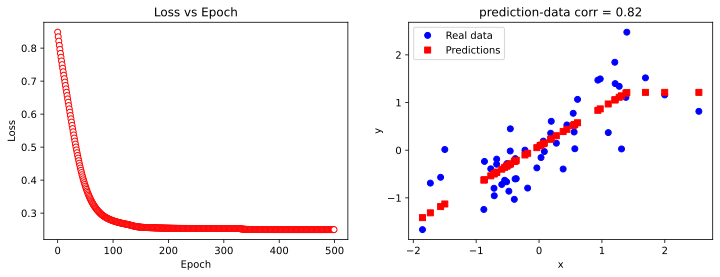

In [13]:
# create a dataset
x,y = dataset_create(.8)
# run the model
y_pred, losses = model_builder_trainer(x,y)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(losses.detach(),'ro', markerfacecolor='w', linewidth=.1)
ax[0].set(title='Loss vs Epoch', xlabel='Epoch', ylabel='Loss')
ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,y_pred.detach(),'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,y_pred.detach().T)[0,1]:.2f}')
ax[1].legend()

plt.show()


In [14]:
# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):

  for N in range(numExps):
  
    # create a dataset and run the model
    x,y = dataset_create(slopes[slopei])
    y_pred,losses = model_builder_trainer(x,y)

    # store the final loss and performance
    results[slopei,N,0] = losses[-1]
    results[slopei,N,1] = np.corrcoef(y.T,y_pred.detach().T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


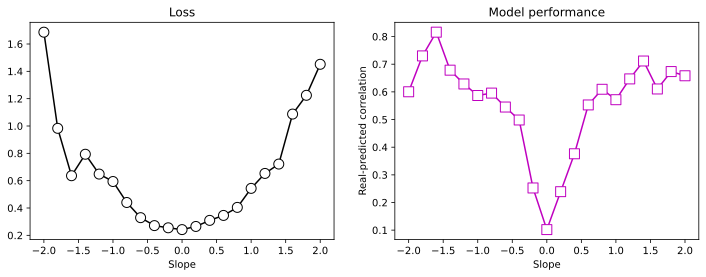

In [15]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()